## A.I. Assignment 5

## Learning Goals

By the end of this lab, you should be able to:
* Get more familiar with tensors in pytorch 
* Create a simple multilayer perceptron model with pytorch
* Visualise the parameters


### Task

Build a fully connected feed forward network that adds two bits. Determine the a propper achitecture for this network (what database you use for this problem? how many layers? how many neurons on each layer? what is the activation function? what is the loss function? etc)

Create at least 3 such networks and compare their performance (how accurate they are?, how farst they are trained to get at 1 accuracy?)

Display for the best one the weights for each layer.


In [1]:
import torch
import torch.nn as nn
from collections import OrderedDict
import matplotlib.pyplot as plt

In [26]:
# your code here
#hidden size = 2
#layers
class MyNeuralNetwork(nn.Module):
    def __init__(self, hidden_size):
        super(MyNeuralNetwork, self).__init__()
        self.network = nn.Sequential(OrderedDict([
        ('hidden',nn.Linear(2, hidden_size)),
        ('relu', nn.ReLU()),
        ('output', nn.Linear(hidden_size, 2))
        ]))
        self.softmax = nn.Softmax(dim=1)# I use softmax because its a multi-class classification
    def forward(self, x):
        x = self.network(x)
        return x



In [27]:
model = MyNeuralNetwork(3);

print(model)

MyNeuralNetwork(
  (network): Sequential(
    (hidden): Linear(in_features=2, out_features=3, bias=True)
    (relu): ReLU()
    (output): Linear(in_features=3, out_features=2, bias=True)
  )
  (softmax): Softmax(dim=1)
)


In [21]:
# your code here
data_in = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
print(data_in)

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


In [22]:
data_target = torch.tensor([[0, 0], [0, 1], [0, 1], [1, 0]], dtype=torch.float32)
print(data_target)

tensor([[0., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.]])


In [28]:
# your code here
criterion = nn.BCEWithLogitsLoss() #once again for multiclass
optimizer = torch.optim.SGD(model.parameters(), lr=0.1) 

In [29]:
# your code here
# Train the model
# Assuming you have a DataLoader
num_epochs = 1000
iterations = []
losses = []
for epoch in range(num_epochs):
    outputs = model(data_in)
    loss = criterion(outputs, data_target)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    iterations.append(epoch)
    losses.append(loss.item())
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.6214
Epoch [200/1000], Loss: 0.5578
Epoch [300/1000], Loss: 0.4553
Epoch [400/1000], Loss: 0.3498
Epoch [500/1000], Loss: 0.2800
Epoch [600/1000], Loss: 0.2294
Epoch [700/1000], Loss: 0.1869
Epoch [800/1000], Loss: 0.1491
Epoch [900/1000], Loss: 0.1178
Epoch [1000/1000], Loss: 0.0941


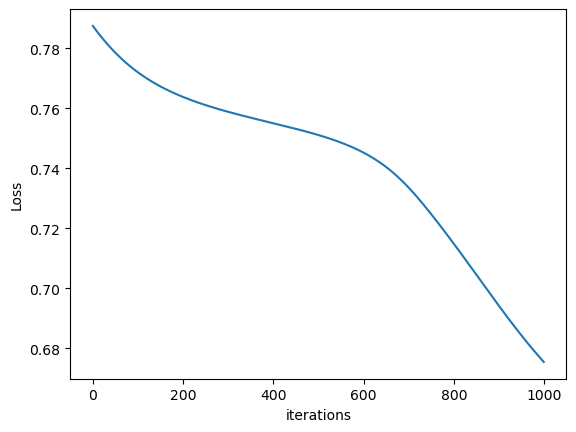

In [25]:
# your code here
# visualize the resuts
plt.plot(iterations, losses)
plt.ylabel("Loss")
plt.xlabel("iterations")
plt.show()

In [16]:
# your code here
# print model weights
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

network.hidden.weight tensor([[ 0.5435, -0.5076],
        [ 0.0023, -0.2568],
        [-0.9635, -0.8836]])
network.hidden.bias tensor([-0.0375, -0.2020,  1.8314])
network.output.weight tensor([[-0.1563,  0.1259, -1.7231],
        [ 0.4575, -0.2357,  1.4541]])
network.output.bias tensor([ 0.3787, -0.1411])


MyNeuralNetwork2(
  (network): Sequential(
    (hidden): Linear(in_features=2, out_features=5, bias=True)
    (relu): ReLU()
    (output): Linear(in_features=5, out_features=2, bias=True)
  )
)
Epoch [100/1000], Loss: 0.6215
Epoch [200/1000], Loss: 0.5763
Epoch [300/1000], Loss: 0.5294
Epoch [400/1000], Loss: 0.4761
Epoch [500/1000], Loss: 0.4110
Epoch [600/1000], Loss: 0.3381
Epoch [700/1000], Loss: 0.3017
Epoch [800/1000], Loss: 0.2833
Epoch [900/1000], Loss: 0.2735
Epoch [1000/1000], Loss: 0.2664


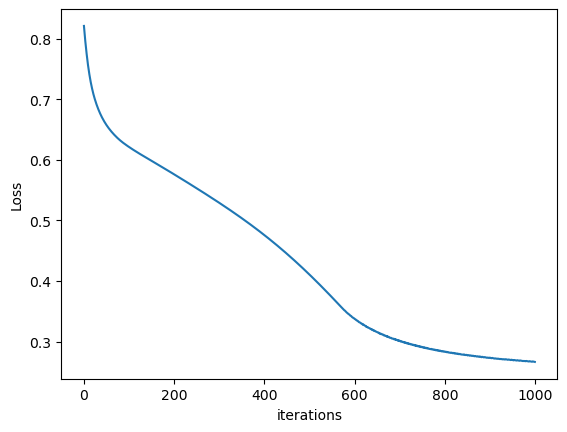

In [30]:
class MyNeuralNetwork2(nn.Module):
    def __init__(self, hidden_size):
        super(MyNeuralNetwork2, self).__init__()
        self.network = nn.Sequential(OrderedDict([
        ('hidden',nn.Linear(2, hidden_size)),
        ('relu', nn.ReLU()),
        ('output', nn.Linear(hidden_size, 2))
        ]))
    def forward(self, x):
        return self.network(x)
        
model2 = MyNeuralNetwork2(5);
print(model2)
data_in = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
data_target = torch.tensor([[0, 0], [0, 1], [0, 1], [1, 0]], dtype=torch.float32)


criterion2 = nn.BCEWithLogitsLoss() #once again for multiclass
optimizer2 = torch.optim.SGD(model2.parameters(), lr=0.1) 

num_epochs = 1000
iterations = []
losses = []
for epoch in range(num_epochs):
    outputs = model2(data_in)
    loss = criterion2(outputs, data_target)

    # Backward pass and optimization
    optimizer2.zero_grad()
    loss.backward()
    optimizer2.step()

    iterations.append(epoch)
    losses.append(loss.item())
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# your code here
# visualize the resuts
plt.plot(iterations, losses)
plt.ylabel("Loss")
plt.xlabel("iterations")
plt.show()

MyNeuralNetwork3(
  (network): Sequential(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=4, out_features=2, bias=True)
  )
)
Epoch [100/10000], Loss: 0.3743
Epoch [200/10000], Loss: 0.3406
Epoch [300/10000], Loss: 0.2854
Epoch [400/10000], Loss: 0.2576
Epoch [500/10000], Loss: 0.2596
Epoch [600/10000], Loss: 0.2533
Epoch [700/10000], Loss: 0.2546
Epoch [800/10000], Loss: 0.2598
Epoch [900/10000], Loss: 0.2539
Epoch [1000/10000], Loss: 0.2586
Epoch [1100/10000], Loss: 0.2622
Epoch [1200/10000], Loss: 0.2577
Epoch [1300/10000], Loss: 0.2593
Epoch [1400/10000], Loss: 0.2570
Epoch [1500/10000], Loss: 0.2584
Epoch [1600/10000], Loss: 0.2594
Epoch [1700/10000], Loss: 0.2532
Epoch [1800/10000], Loss: 0.2564
Epoch [1900/10000], Loss: 0.2547
Epoch [2000/10000], Loss: 0.2550
Epoch [2100/10000], Loss: 0.2587
Epoch [2200/10000], Loss: 0.2535
Epoch [2300/10000], Loss: 0.2599
Epoch [2400/10000], Loss: 0.2615
Epoch [2500/

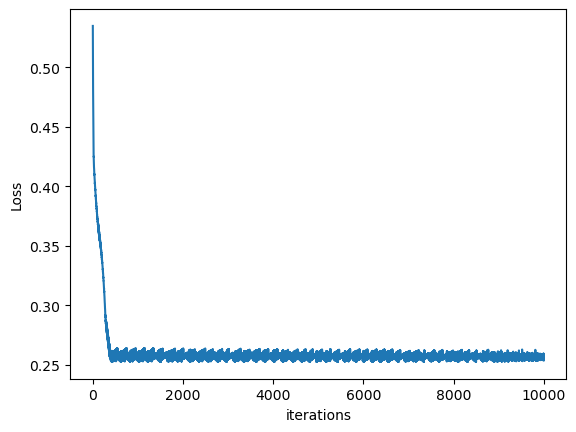

In [2]:
class MyNeuralNetwork3(nn.Module):
    def __init__(self, hidden_size):
        super(MyNeuralNetwork3, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(2, hidden_size),
            nn.LeakyReLU(),  # Leaky ReLU activation
            nn.Linear(hidden_size, 2)
        )
    def forward(self, x):
        return self.network(x)
        
model3 = MyNeuralNetwork3(4);
print(model3)
data_in = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
data_target = torch.tensor([[0, 0], [0, 1], [0, 1], [1, 0]], dtype=torch.float32)


criterion3 = nn.L1Loss() #Mean Absolute Error Loss
optimizer3 = torch.optim.SGD(model3.parameters(), lr=0.05) 

num_epochs = 10000
iterations = []
losses = []
for epoch in range(num_epochs):
    outputs = model3(data_in)
    loss = criterion3(outputs, data_target)

    # Backward pass and optimization
    optimizer3.zero_grad()
    loss.backward()
    optimizer3.step()

    iterations.append(epoch)
    losses.append(loss.item())
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# your code here
# visualize the resuts
plt.plot(iterations, losses)
plt.ylabel("Loss")
plt.xlabel("iterations")
plt.show()

MyNeuralNetwork4(
  (network): Sequential(
    (0): Linear(in_features=2, out_features=2, bias=True)
    (1): Tanh()
    (2): Linear(in_features=2, out_features=2, bias=True)
  )
)
Epoch [100/1000], Loss: 0.3750
Epoch [200/1000], Loss: 0.3750
Epoch [300/1000], Loss: 0.3749
Epoch [400/1000], Loss: 0.3749
Epoch [500/1000], Loss: 0.3748
Epoch [600/1000], Loss: 0.3746
Epoch [700/1000], Loss: 0.3743
Epoch [800/1000], Loss: 0.3737
Epoch [900/1000], Loss: 0.3725
Epoch [1000/1000], Loss: 0.3694


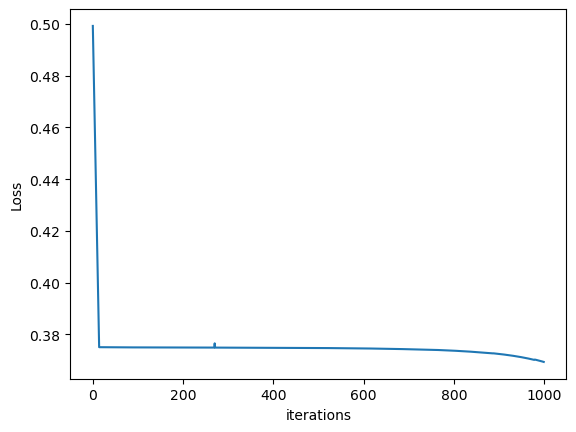

In [5]:
class MyNeuralNetwork4(nn.Module):
    def __init__(self, hidden_size):
        super(MyNeuralNetwork4, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(2, hidden_size),
            nn.Tanh(),  # Hyperbolic Tangent (Tanh) activation
            nn.Linear(hidden_size, 2),
        )
    def forward(self, x):
        return self.network(x)
        
model4 = MyNeuralNetwork4(2);
print(model4)
data_in = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
data_target = torch.tensor([[0, 0], [0, 1], [0, 1], [1, 0]], dtype=torch.float32)


criterion4 = nn.L1Loss() #Mean Absolute Error Loss
optimizer4 = torch.optim.SGD(model4.parameters(), lr=0.1) 

num_epochs = 1000
iterations = []
losses = []
for epoch in range(num_epochs):
    outputs = model4(data_in)
    loss = criterion4(outputs, data_target)

    # Backward pass and optimization
    optimizer4.zero_grad()
    loss.backward()
    optimizer4.step()

    iterations.append(epoch)
    losses.append(loss.item())
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# your code here
# visualize the resuts
plt.plot(iterations, losses)
plt.ylabel("Loss")
plt.xlabel("iterations")
plt.show()